In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [2]:
df = pd.read_csv('dielectron.csv')

In [3]:
df.head()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,147115,366639895,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1,8.94841
1,147115,366704169,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1,15.89300
2,147115,367112316,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1,38.38770
3,147115,366952149,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1,3.72862
4,147115,366523212,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1,2.74718


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Run     100000 non-null  int64  
 1   Event   100000 non-null  int64  
 2   E1      100000 non-null  float64
 3   px1     100000 non-null  float64
 4   py1     100000 non-null  float64
 5   pz1     100000 non-null  float64
 6   pt1     100000 non-null  float64
 7   eta1    100000 non-null  float64
 8   phi1    100000 non-null  float64
 9   Q1      100000 non-null  int64  
 10  E2      100000 non-null  float64
 11  px2     100000 non-null  float64
 12  py2     100000 non-null  float64
 13  pz2     100000 non-null  float64
 14  pt2     100000 non-null  float64
 15  eta2    100000 non-null  float64
 16  phi2    100000 non-null  float64
 17  Q2      100000 non-null  int64  
 18  M       99915 non-null   float64
dtypes: float64(15), int64(4)
memory usage: 14.5 MB


In [5]:
# Drop rows with missing values
df2 = df.dropna(subset = ['M'])

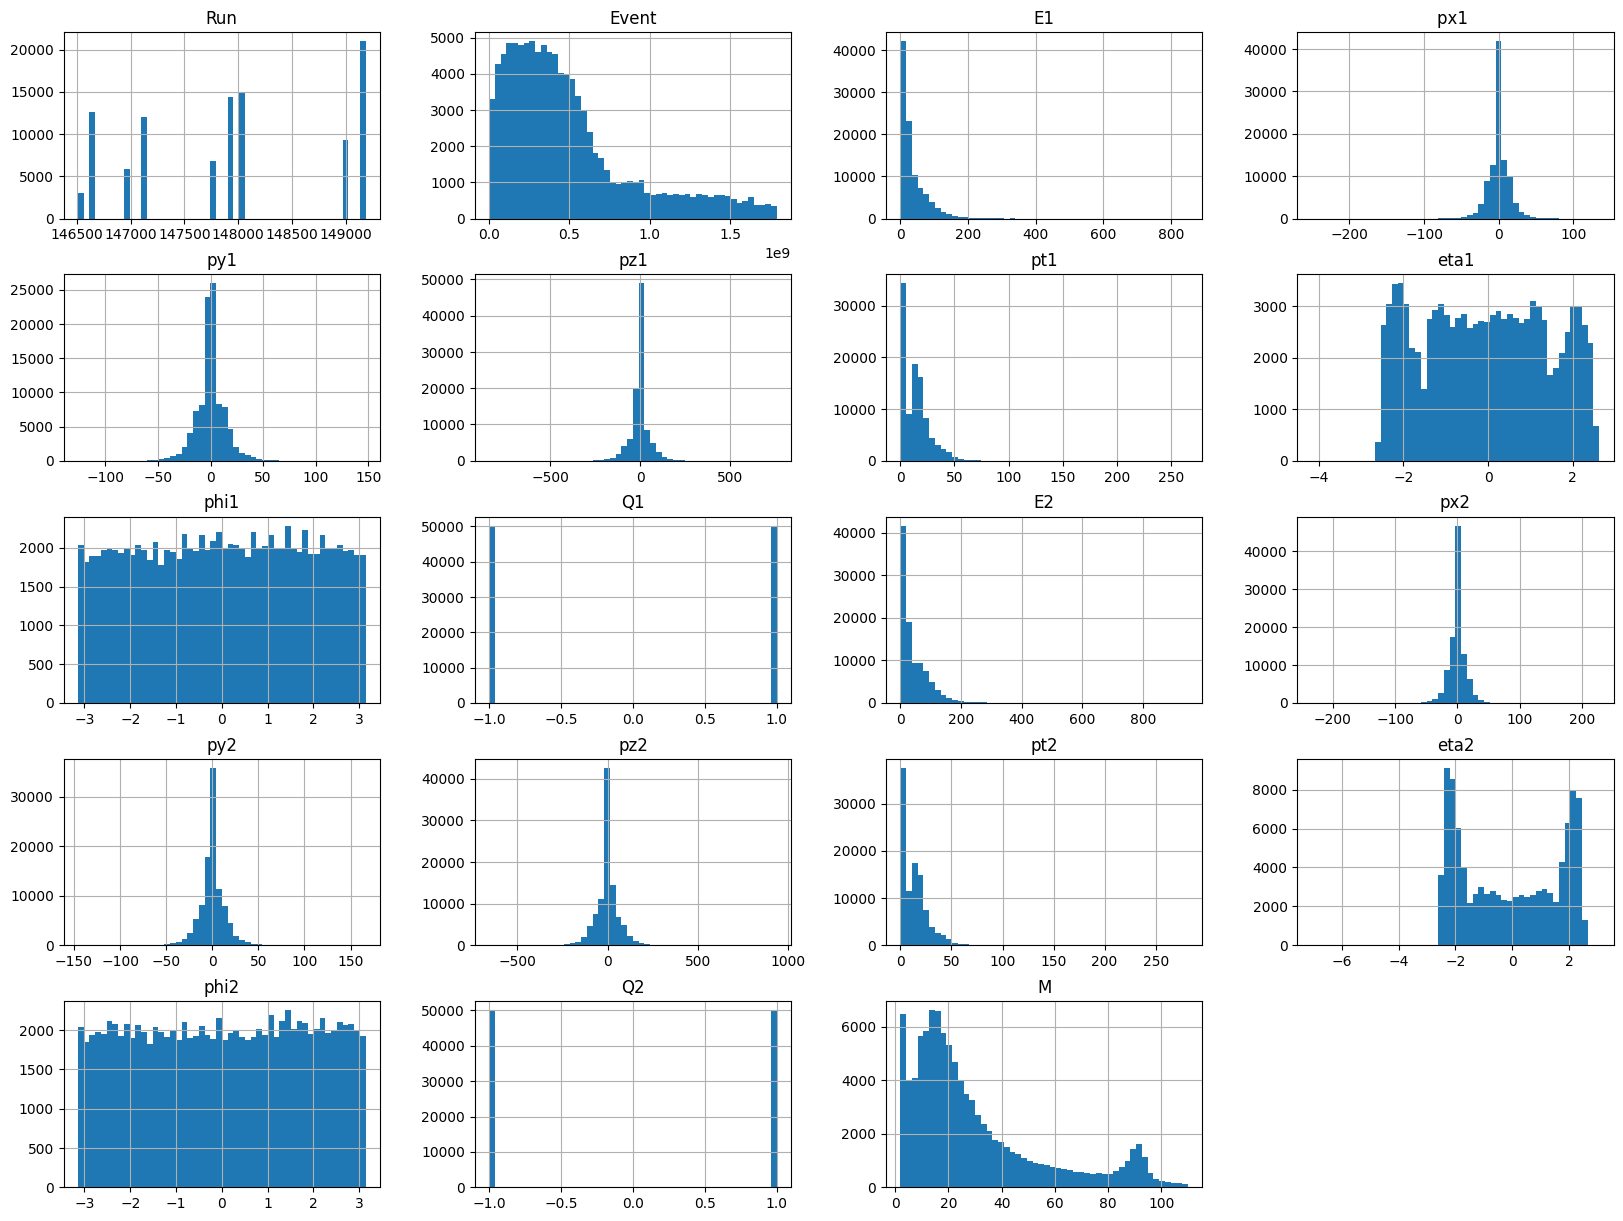

In [6]:
df2.hist(bins=50, figsize=(20, 15))
plt.show()

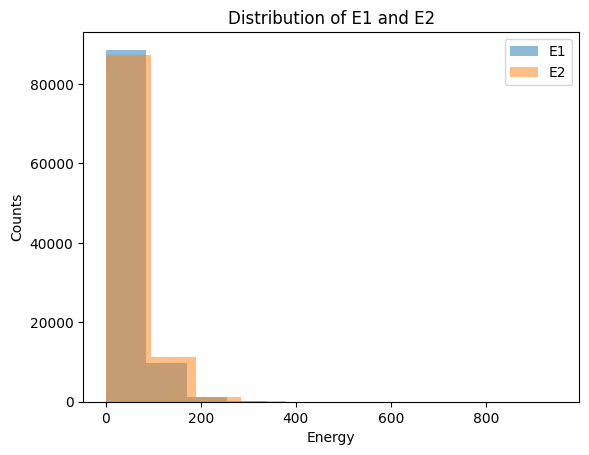

In [7]:
# Plot histograms to visualize the distributions of E1 and E2
plt.hist(df2['E1'], bins = 10, alpha = 0.5, label = 'E1')
plt.hist(df2['E2'], bins = 10, alpha = 0.5, label = 'E2')
plt.legend(loc = 'upper right')
plt.xlabel('Energy')
plt.ylabel('Counts')
plt.title('Distribution of E1 and E2')
plt.show()

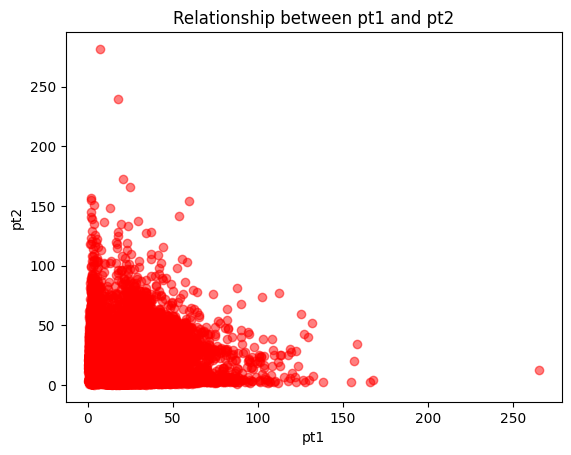

In [8]:
# Plot scatter plots or 2D histograms to visualize the relationship between pt1 and pt2, eta1 and eta2
plt.scatter(df2['pt1'], df2['pt2'], color='red', alpha=0.5)
plt.xlabel('pt1')
plt.ylabel('pt2')
plt.title('Relationship between pt1 and pt2')
plt.show()


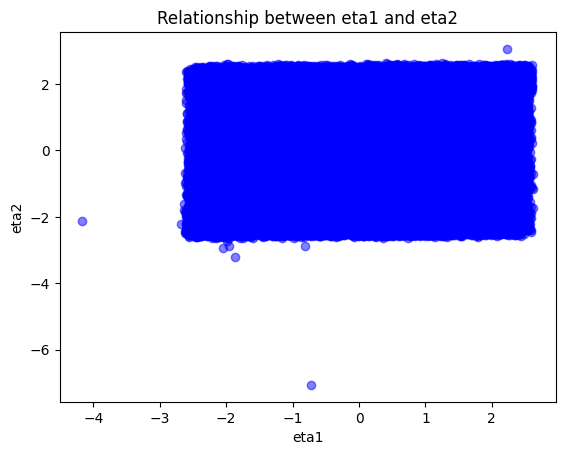

In [9]:
plt.scatter(df2['eta1'], df2['eta2'], color='blue', alpha=0.5)
plt.xlabel('eta1')
plt.ylabel('eta2')
plt.title('Relationship between eta1 and eta2')
plt.show()


<AxesSubplot: xlabel='pt2'>

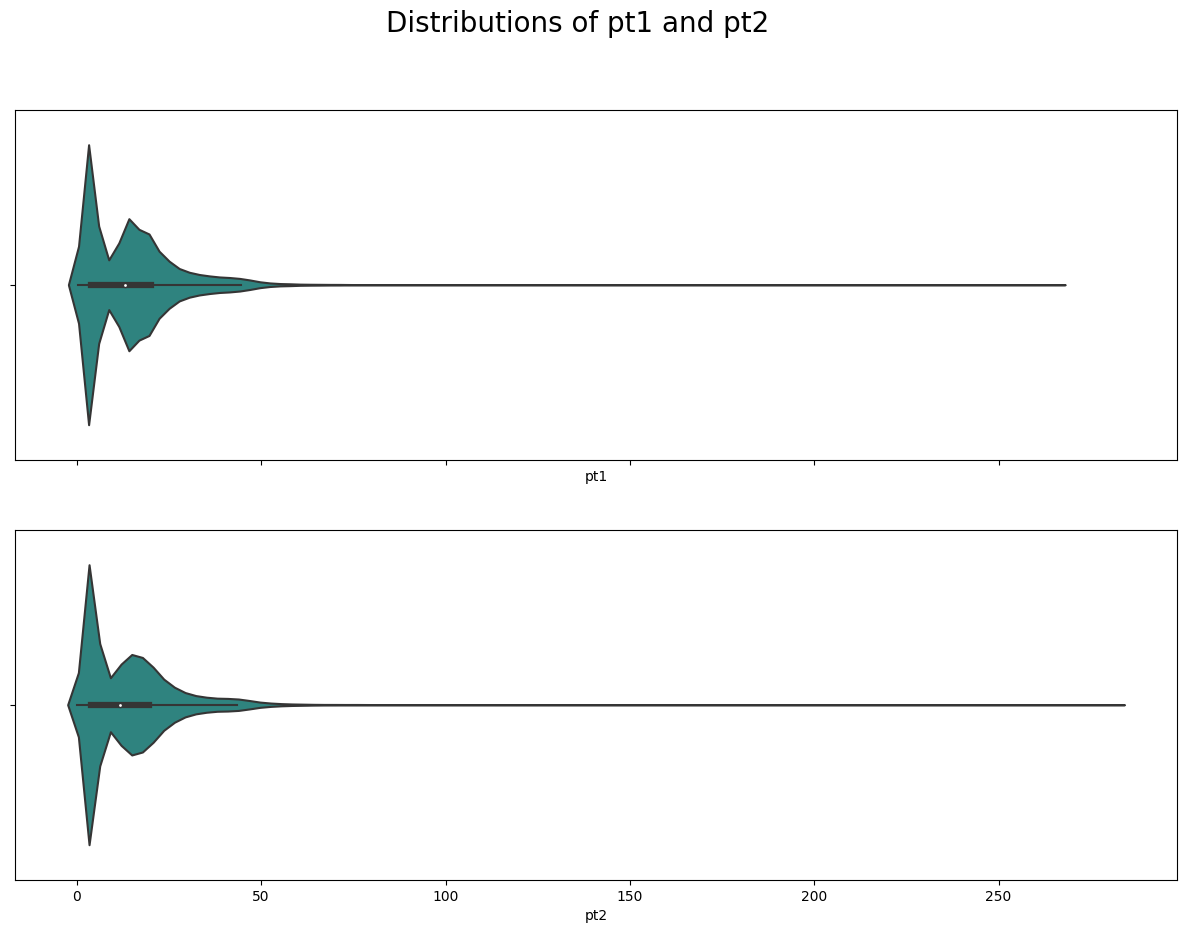

In [10]:
fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True,
                               figsize=(15, 10))
fig.suptitle('Distributions of pt1 and pt2', fontsize=20)
sns.violinplot(data=df2, x='pt1', palette='viridis', ax=ax1)
sns.violinplot(data=df2, x='pt2', palette='viridis', ax=ax2)

<AxesSubplot: ylabel='eta2'>

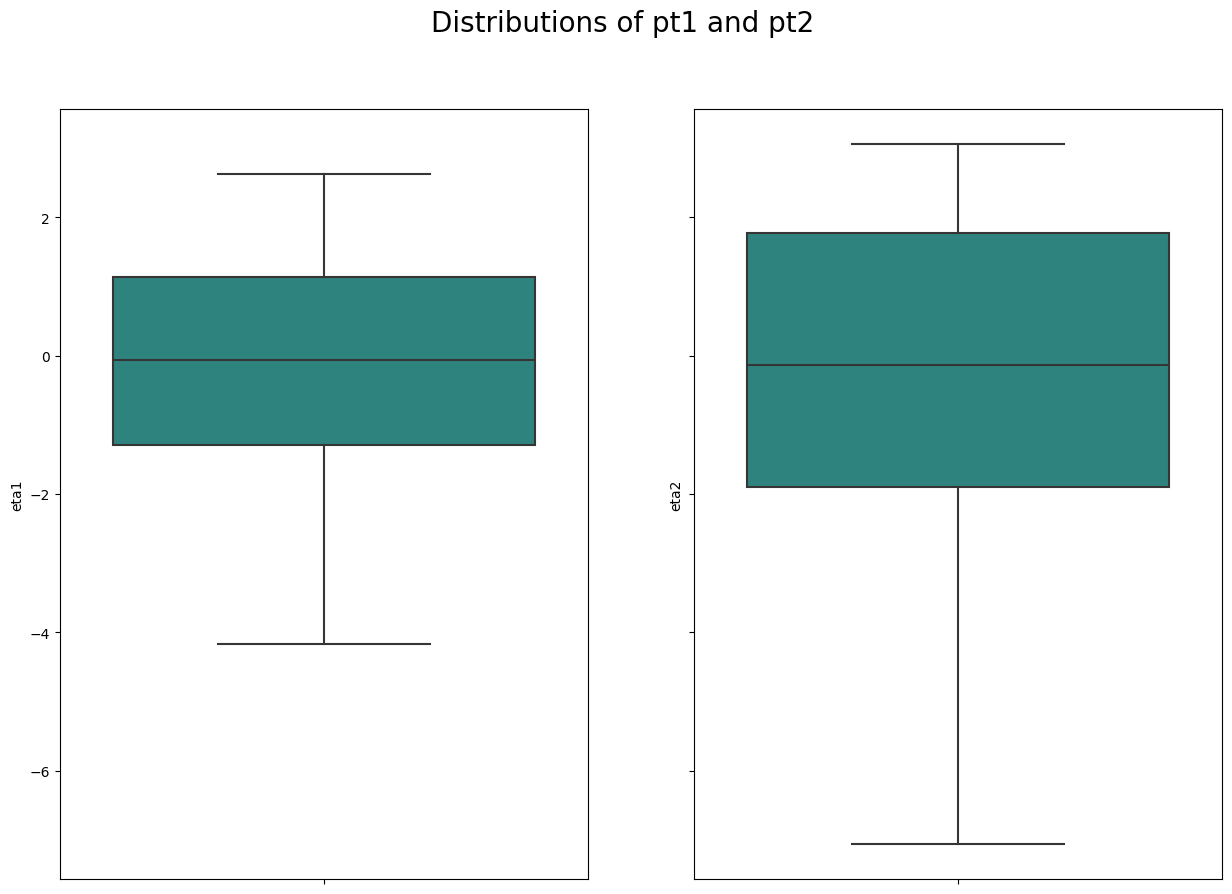

In [11]:
# Plot a box plot to visualize the distributions of eta1 and eta2
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True,
                               figsize=(15, 10))
fig.suptitle('Distributions of pt1 and pt2', fontsize=20)
sns.boxplot(data=df2, y='eta1', palette='viridis', ax=ax1)
sns.boxplot(data=df2, y='eta2', palette='viridis', ax=ax2)

In [12]:
# Calculate the correlation matrix of the variables
corr_matrix = df2.corr()


<AxesSubplot: >

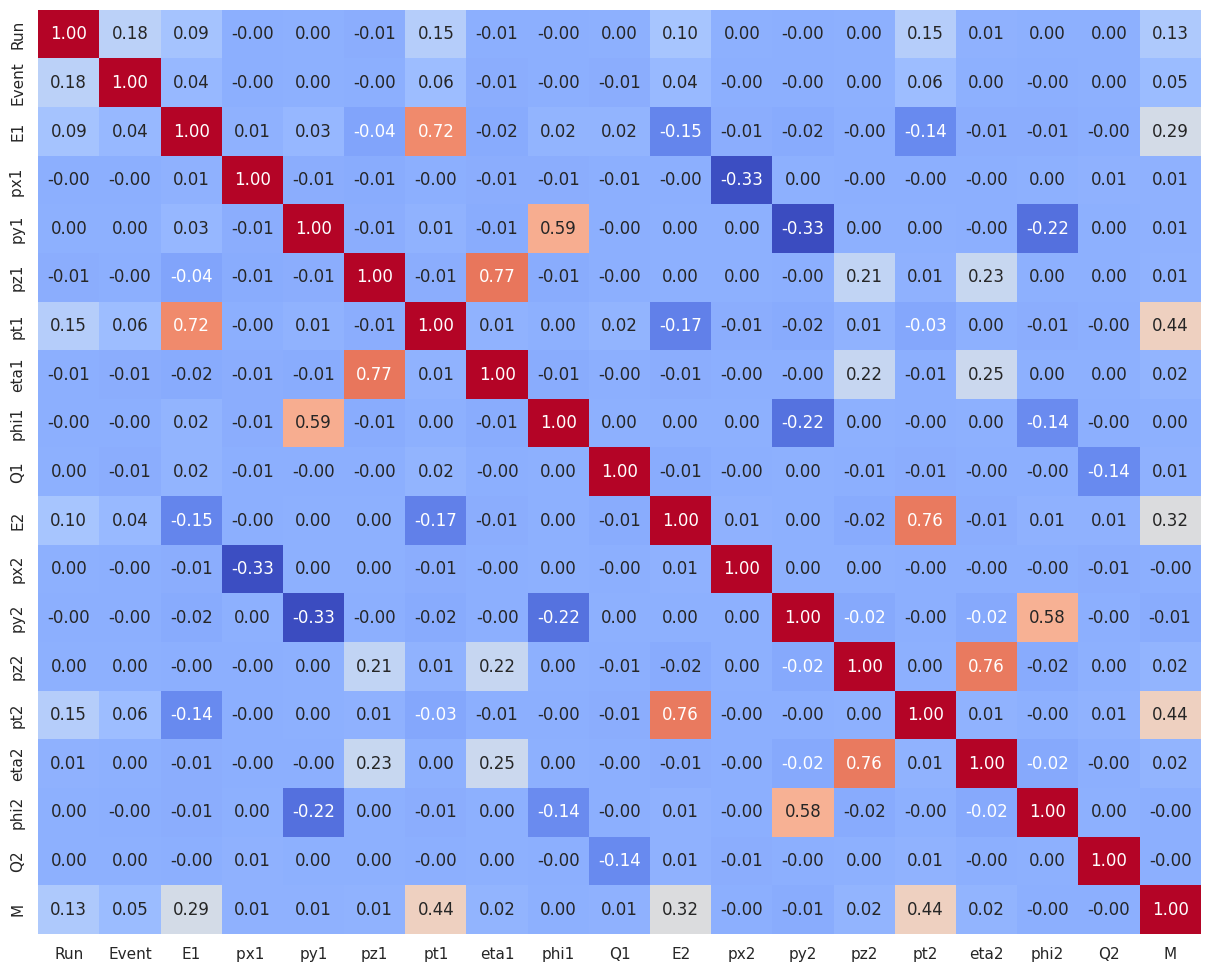

In [13]:
# Plot a heatmap of the correlation matrix
sns.set(rc={'figure.figsize':(15,12)})
g = sns.heatmap(df2.corr(),annot=True, fmt = ".2f", cmap = "coolwarm", cbar=False)
plt.gca()

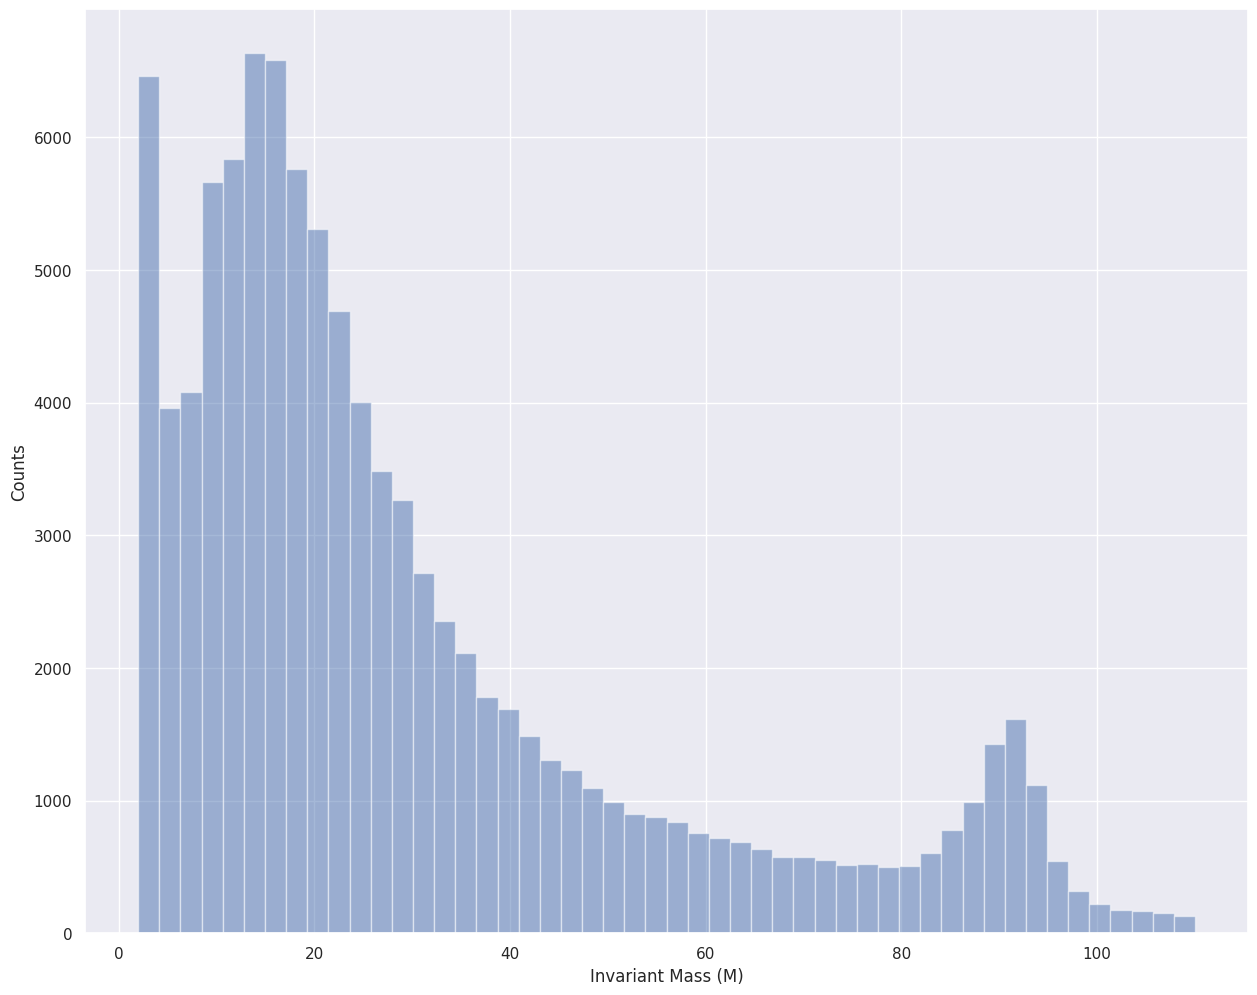

In [14]:
# Plot histograms to visualize the distribution of the invariant mass
plt.hist(df2['M'], bins = 50, alpha = 0.5)
plt.xlabel('Invariant Mass (M)')
plt.ylabel('Counts')
plt.show()

the distribution of invariant mass is right skewed with high frequency

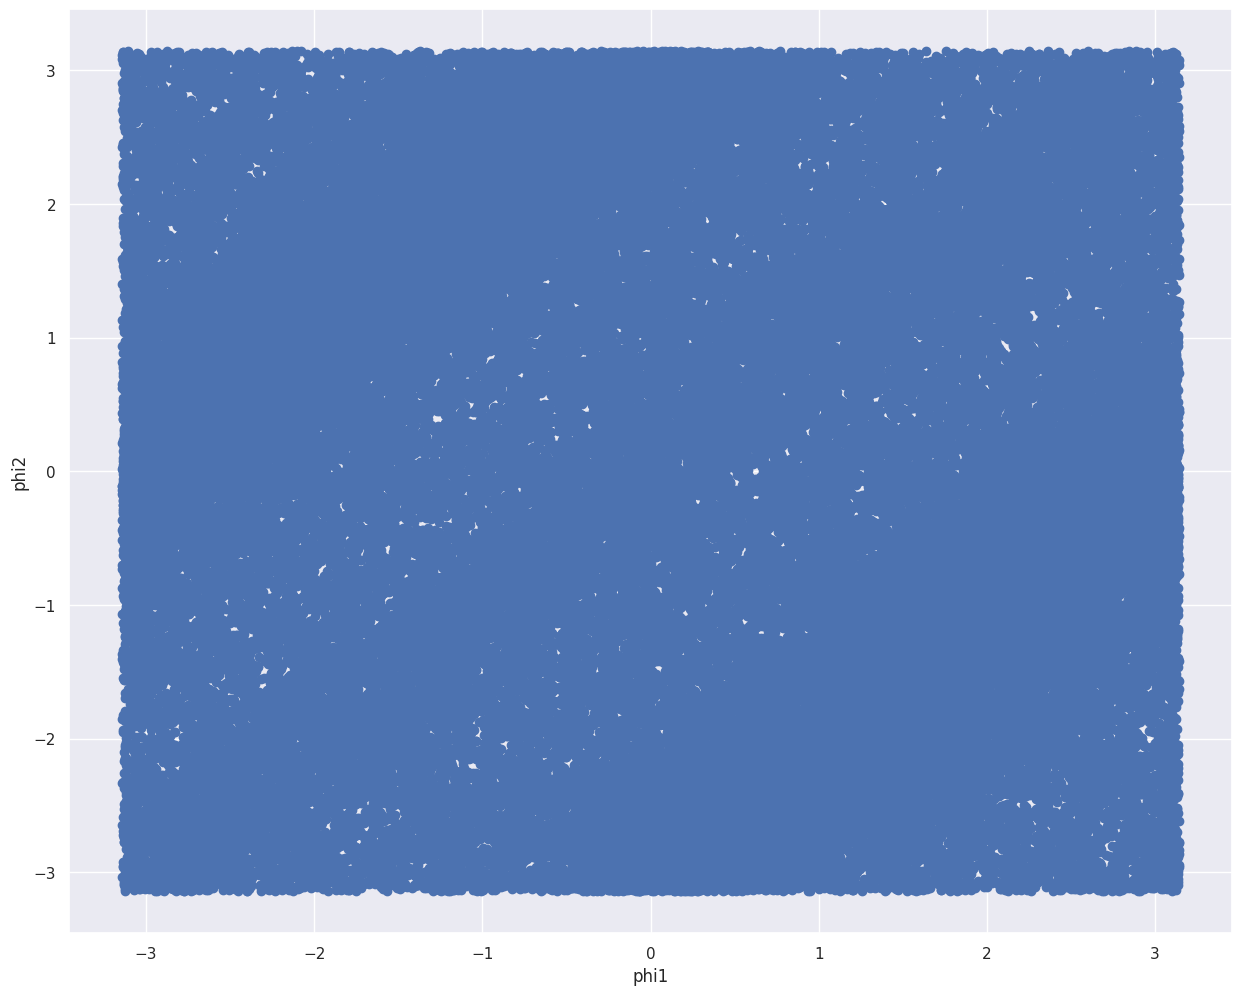

In [15]:
# Plot scatter plots or 2D histograms to visualize the relationship between phi1 and phi2
plt.scatter(df2['phi1'], df2['phi2'])
plt.xlabel('phi1')
plt.ylabel('phi2')
plt.show()

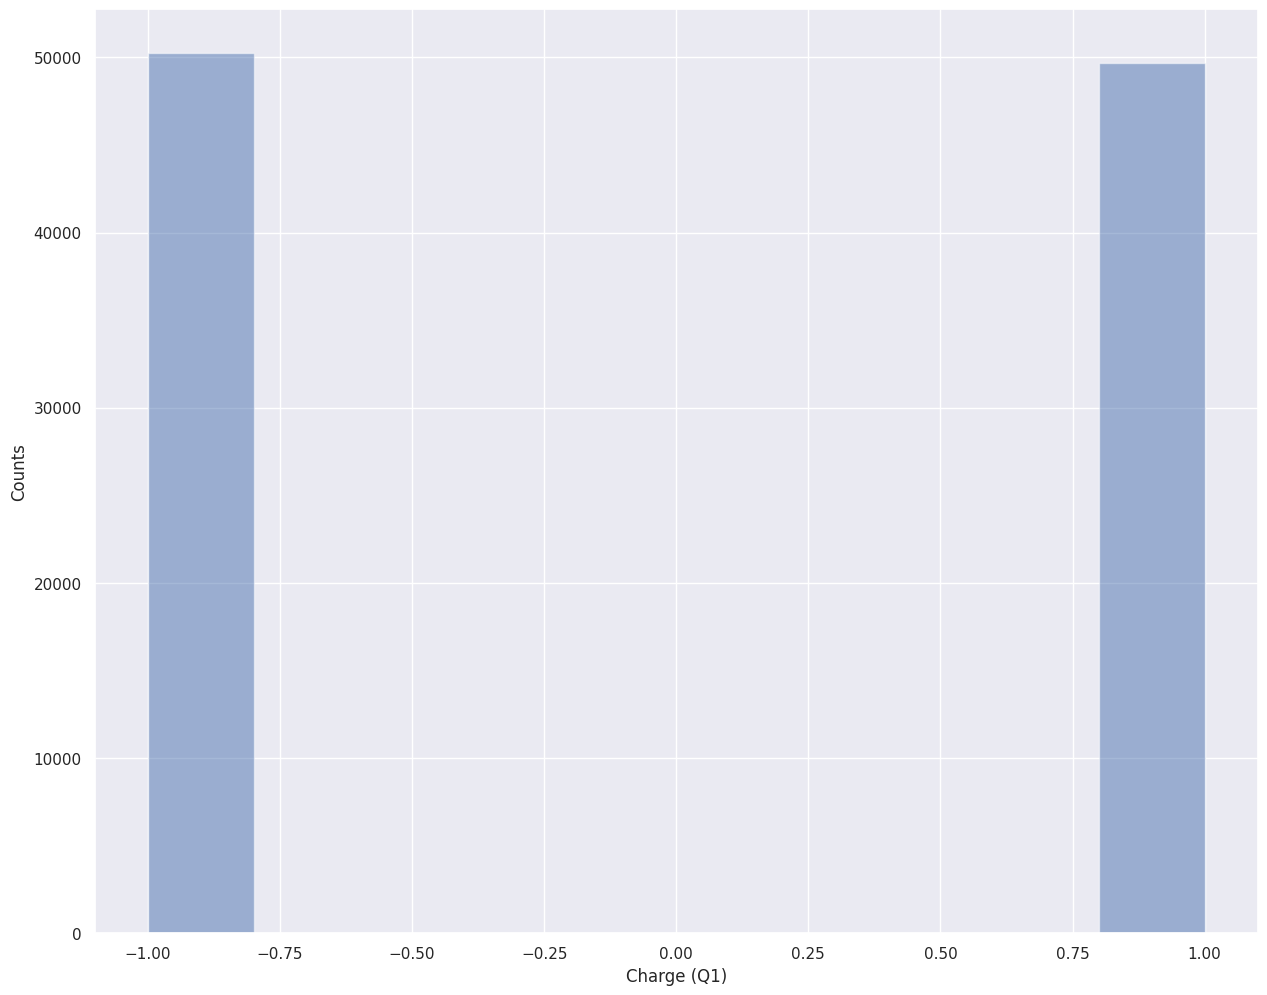

In [16]:
# Plot histograms or bar plots to visualize the distribution of the charges
plt.hist(df2['Q1'], bins = 10, alpha = 0.5)
plt.xlabel('Charge (Q1)')
plt.ylabel('Counts')
plt.show()

In [17]:
#Split the dataset into training and testing sets
X = df2[['pt1', 'pt2', 'eta1', 'eta2']]
y = df2['M']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# Train and fit different regression models
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_pred = linear_reg.predict(X_test)

In [20]:
decision_tree = DecisionTreeRegressor(random_state=0)
decision_tree.fit(X_train, y_train)
decision_tree_pred = decision_tree.predict(X_test)

In [21]:
random_forest = RandomForestRegressor(n_estimators=100, random_state=0)
random_forest.fit(X_train, y_train)
random_forest_pred = random_forest.predict(X_test)


In [22]:
# Calculate the mean squared error for each model
linear_reg_mse = mean_squared_error(y_test, linear_reg_pred)
decision_tree_mse = mean_squared_error(y_test, decision_tree_pred)
random_forest_mse = mean_squared_error(y_test, random_forest_pred)

In [23]:
# Print the mean squared error for each model
print('Mean Squared Error for Linear Regression:', linear_reg_mse)
print('Mean Squared Error for Decision Tree:', decision_tree_mse)
print('Mean Squared Error for Random Forest:', random_forest_mse)


Mean Squared Error for Linear Regression: 379.9852924337932
Mean Squared Error for Decision Tree: 62.61381757903837
Mean Squared Error for Random Forest: 27.804934215388492


In [24]:
# Select the model with the lowest mean squared error
if linear_reg_mse < decision_tree_mse and linear_reg_mse < random_forest_mse:
    selected_model = linear_reg
    print(f"selected model is linear regression linear regression mse: {linear_reg_mse}")
elif decision_tree_mse < linear_reg_mse and decision_tree_mse < random_forest_mse:
    selected_model = decision_tree
    print(f"selected model is decision tree, decision tree mse: {decision_tree_mse}")
else:
    selected_model = random_forest
    print(f"selected model is random forest, random forest mse: {random_forest_mse}")

selected model is random forest, random forest mse: 27.804934215388492


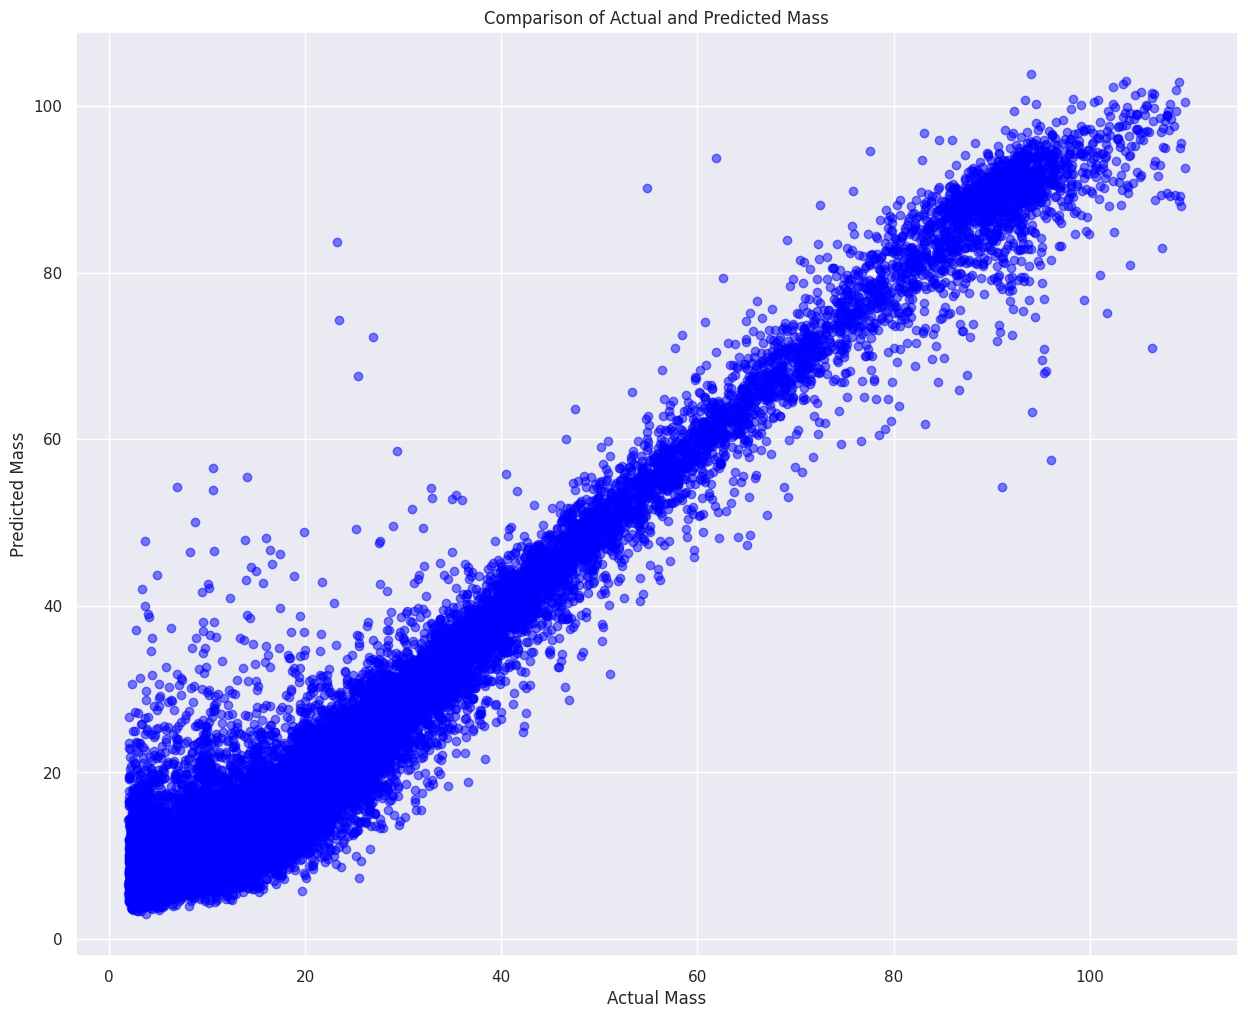

In [25]:
# Plot the predicted values against the actual values
y_pred = selected_model.predict(X_test)
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Actual Mass')
plt.ylabel('Predicted Mass')
plt.title('Comparison of Actual and Predicted Mass')
plt.show()
